# Hypothesis Testing

### 1. Creating a Sample Distribution from our Control and Experimental groups

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/drug_trial.csv"
df = pd.read_csv(file_name)
df.head()

,group,mean_duration
0,Control,7
1,Control,5
2,Control,4
3,Control,5
4,Control,8


In [2]:
df.shape

(80, 2)

In [3]:
df['group'].value_counts()

Experimental    40
Control         40
Name: group, dtype: int64

In [4]:
# Show means of Control and Experimental groups
control_mean = df[df['group'] == 'Control'].mean()
experiment_mean = df[df['group'] == 'Experimental'].mean()
print('Control Mean = ',str(control_mean))
print("Experiment Mean = ",str(experiment_mean))

Control Mean =  mean_duration    5.4
dtype: float64
Experiment Mean =  mean_duration    4.8
dtype: float64


### Let's run 10,000 Permutations

Mean Differences Mean : -0.002978763205549433


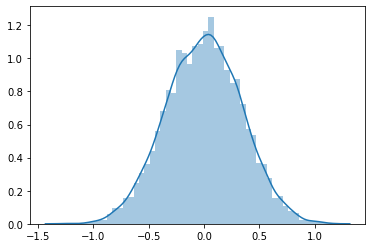

In [5]:
mean_difference = control_mean - experiment_mean
data_points = list(df['mean_duration'])
mean_differences = []
num_of_iterations = 10000

for i in range(num_of_iterations):
    group1 = []
    group2 = []
    for data_point in data_points:
        random_assignment = np.random.randint(0,2) == True
        if random_assignment:
            group1.append(data_point)
        else:
            group2.append(data_point)
    trial_mean_difference = np.mean(group2) - np.mean(group1)
    mean_differences.append(trial_mean_difference)
    
print("Mean Differences Mean : "+str(np.array(mean_differences).mean()))
#Generate Frequency or Histogram plot
sns.distplot(mean_differences)

## How many values exceed the mean difference of 0.6?

In [6]:
# Convert our mean_differences to a data frame for easy manipulation
mean_differences = pd.DataFrame(mean_differences)
# Get the length of this series to count the number of value exceeding 0.6
exceeds_mean_diff = len(mean_differences[mean_differences[0] >= 0.6])
print(exceeds_mean_diff)

353


## Calculating the P-Value

In [7]:
# Number of trials we performed was 10,000
# P-Value is equal to the 

p_value = exceeds_mean_diff / num_of_iterations
print(p_value)

0.0353
